<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

# Walmart sales project

##### Importing necessary librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe_connected" if working on JULIE

##### Importing the dataset

In [2]:
# Import dataset
print("Loading dataset...")
df = pd.read_csv("walmart.csv")
print("...Done.")
print()

Loading dataset...
...Done.



##### Understanding the overall structure of the dataset

In [3]:
df.shape

(150, 8)

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [5]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN
149,19.0,20-04-2012,1255087.26,0.0,55.20,4.170,137.923067,8.150


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [7]:
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

#### Exploratory data analysis

##### Spot visually missing values

<AxesSubplot:>

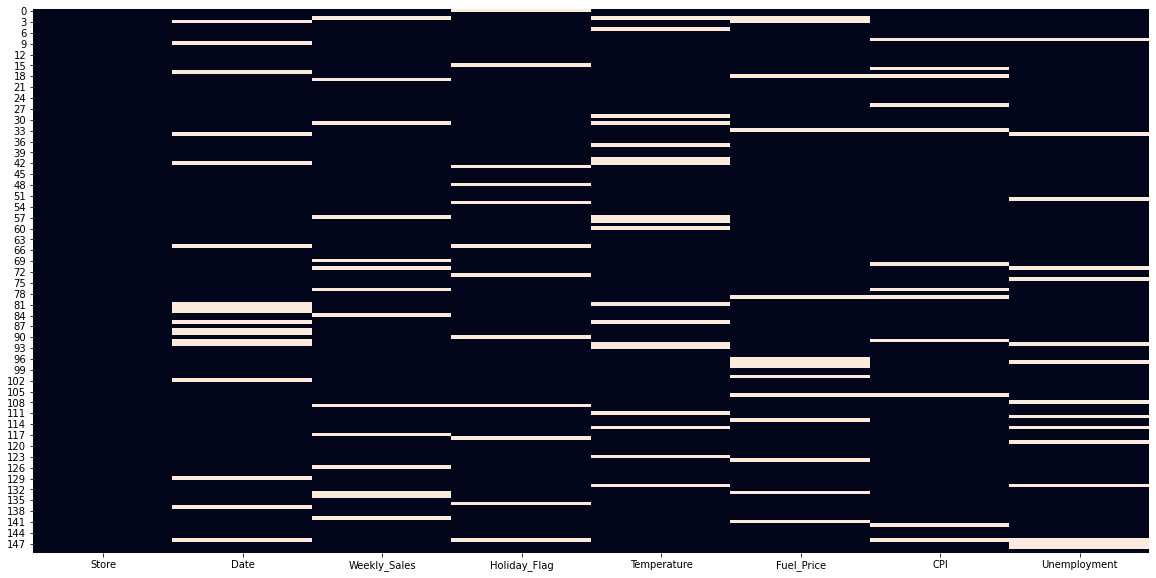

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

##### The white strips above are missing values

#### Histograms of continuous variables

<Figure size 432x288 with 0 Axes>

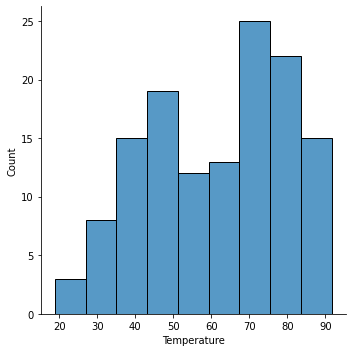

<Figure size 432x288 with 0 Axes>

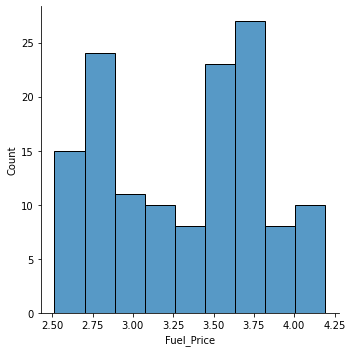

<Figure size 432x288 with 0 Axes>

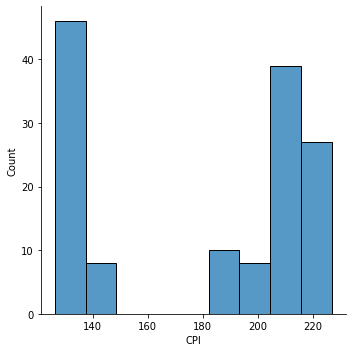

<Figure size 432x288 with 0 Axes>

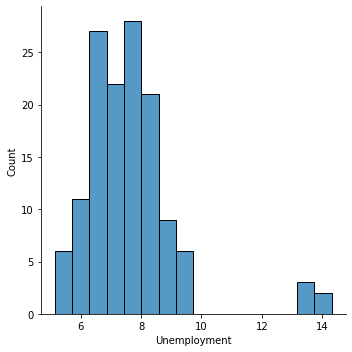

<Figure size 432x288 with 0 Axes>

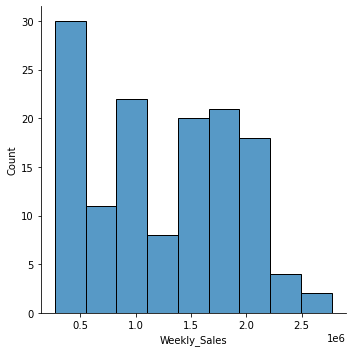

In [9]:
continuous_variables = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Weekly_Sales"]
for continuous_variable in continuous_variables:
    plt.figure()
    sns.displot(df[continuous_variable])

##### Visualize the relationship between "Weekly_Sales", the target, and "Fuel_Price"

<Figure size 432x288 with 0 Axes>

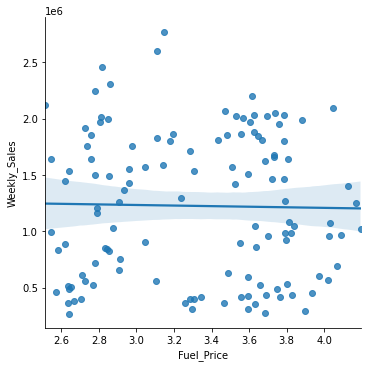

In [10]:
plt.figure()
sns.lmplot(x="Fuel_Price", y ="Weekly_Sales", data=df)

##### Visualize the relationship between "Weekly_Sales", the target, and "Temperature"

<Figure size 432x288 with 0 Axes>

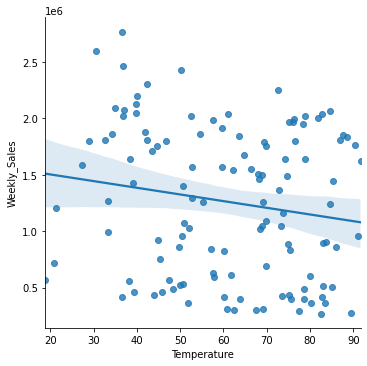

In [11]:
plt.figure()
sns.lmplot(x="Temperature", y ="Weekly_Sales", data=df)

##### Show the categories present in the column "Holiday_Flag"

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

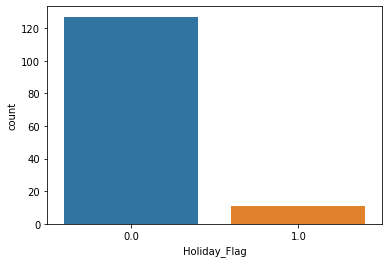

In [12]:
sns.countplot(df["Holiday_Flag"])

##### Visualize "Weekly_Sales", the target, which is a quantitative variable

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weekly_Sales'>

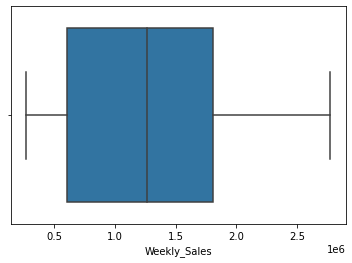

In [13]:
sns.boxplot(df["Weekly_Sales"])

#### Preprocessing with Pandas

Drop the lines in the dataset for which the value in "Weekly_Sales" column is missing

In [14]:
df = df.loc[df["Weekly_Sales"].notnull(), :]
print('Done. Number of lines remaining in dataframe : ', df.shape[0])
print()

Done. Number of lines remaining in dataframe :  136



##### Drop the lines in the dataset for which the value in "Store" column is missing

In [15]:
df = df.loc[df["Store"].notnull(), :]
df["Store"] = df["Store"].astype(str)
print('Done. Number of lines remaining in dataframe : ', df.shape[0])
print()

Done. Number of lines remaining in dataframe :  136



##### Drop the lines in the dataset for which the value in "Holiday_Flag" column is missing

In [16]:
df = df.loc[df["Holiday_Flag"].notnull(), :]
print('Done. Number of lines remaining : ', df.shape[0])
print()

Done. Number of lines remaining :  125



### Feature engineering from "Date" column

##### Convert "Date" column from string to "Datetime" object

In [17]:
df["Date"] = pd.to_datetime(df["Date"])

##### Create new columns in the dataset that contain the following numeric features : year, month, day and day of week

In [18]:
df["year"] = df["Date"].apply(lambda date:date.year)
df["month"] = df["Date"].apply(lambda date:date.month)
df["day"] = df["Date"].apply(lambda date:date.day)
df["day_week"] = df["Date"].apply(lambda date:date.dayofweek)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         125 non-null    object        
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  125 non-null    float64       
 3   Holiday_Flag  125 non-null    float64       
 4   Temperature   110 non-null    float64       
 5   Fuel_Price    113 non-null    float64       
 6   CPI           115 non-null    float64       
 7   Unemployment  112 non-null    float64       
 8   year          109 non-null    float64       
 9   month         109 non-null    float64       
 10  day           109 non-null    float64       
 11  day_week      109 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 12.7+ KB


##### Drop the lines in the dataset for which the values in "year","month","day" and "day_week" columns are missing

In [20]:
df = df.loc[df["year"].notnull(), :]
print('Number of lines remaining in dataframe : ', df.shape[0])

Number of lines remaining in dataframe :  109


In [21]:
df = df.loc[df["month"].notnull(), :]
print('Number of lines remaining in dataframe : ', df.shape[0])

Number of lines remaining in dataframe :  109


In [22]:
df = df.loc[df["day"].notnull(), :]
print('Number of lines remaining in dataframe : ', df.shape[0])

Number of lines remaining in dataframe :  109


In [23]:
df = df.loc[df["day_week"].notnull(), :]
print('Number of lines remaining in dataset : ', df.shape[0])

Number of lines remaining in dataset :  109


##### Drop lines containing outliers

In [24]:
print("Dropping outliers of the upper bound of Fuel_Price column")
to_keep = df["Fuel_Price"] <= df["Fuel_Price"].mean() + 3*df["Fuel_Price"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print("Dropping outliers of the lower bound of Fuel_Price column")
to_keep = df["Fuel_Price"] >= df["Fuel_Price"].mean() - 3*df["Fuel_Price"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print()

Dropping outliers of the upper bound of Fuel_Price column
Done. Number of lines remaining :  98
Dropping outliers of the lower bound of Fuel_Price column
Done. Number of lines remaining :  98



In [25]:
print("Dropping outliers of the upper bound of Temperature column")
to_keep = df["Temperature"] <= df["Temperature"].mean() + 3*df["Temperature"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print("Dropping outliers of the lower bound of Temperature column")
to_keep = df["Temperature"] >= df["Temperature"].mean() - 3*df["Temperature"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print()

Dropping outliers of the upper bound of Temperature column
Done. Number of lines remaining :  87
Dropping outliers of the lower bound of Temperature column
Done. Number of lines remaining :  87



In [26]:
print("Dropping outliers of the upper bound of Unemployment column")
to_keep = df["Unemployment"] <= df["Unemployment"].mean() + 3*df["Unemployment"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print("Dropping outliers of the lower bound of Unemployment column")
to_keep = df["Unemployment"] >= df["Unemployment"].mean() - 3*df["Unemployment"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print()

Dropping outliers of the upper bound of Unemployment column
Done. Number of lines remaining :  75
Dropping outliers of the lower bound of Unemployment column
Done. Number of lines remaining :  75



In [27]:
print("Dropping outliers of the upper bound of consumer price index (CPI) column")
to_keep = df["CPI"] <= df["CPI"].mean() + 3*df["CPI"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print("Dropping outliers of the lower bound of consumer price index (CPI) column")
to_keep = df["CPI"] >= df["CPI"].mean() - 3*df["CPI"].std()
df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print()

Dropping outliers of the upper bound of consumer price index (CPI) column
Done. Number of lines remaining :  71
Dropping outliers of the lower bound of consumer price index (CPI) column
Done. Number of lines remaining :  71



In [28]:
df.shape

(71, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         71 non-null     object        
 1   Date          71 non-null     datetime64[ns]
 2   Weekly_Sales  71 non-null     float64       
 3   Holiday_Flag  71 non-null     float64       
 4   Temperature   71 non-null     float64       
 5   Fuel_Price    71 non-null     float64       
 6   CPI           71 non-null     float64       
 7   Unemployment  71 non-null     float64       
 8   year          71 non-null     float64       
 9   month         71 non-null     float64       
 10  day           71 non-null     float64       
 11  day_week      71 non-null     float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.2+ KB


##### Drop the "Date" column which is useless after featuring engineering

In [30]:
df = df.drop(["Date"], axis = 1)

##### Ensure that the dataset does not contain any missing values before further processing

In [31]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
day_week        0
dtype: int64

In [32]:
df.shape

(71, 11)

#### => Machine learning will be conducted on a dataframe containing 71 lines without any missing values

## Experiment 1 : baseline model

### Train pipeline for baseline model

##### Separate target variable y from features X

In [33]:
print("Separating labels from features...")
features_list = ["Store", "Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment", "month", "year","day", "day_week"]
target_variable = "Weekly_Sales"

X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

print("...Done.")
print()

print('y : ')
print(y)
print()
print('X :')
print(X)

Separating labels from features...
...Done.

y : 
1      1807545.43
4      1644470.66
6       695396.19
7      2203523.20
10      895066.50
          ...    
139     532739.77
143     396968.80
144     424513.08
145    2248645.59
149    1255087.26
Name: Weekly_Sales, Length: 71, dtype: float64

X :
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
1    13.0           0.0        42.38       3.435  128.616064         7.470   
4     6.0           0.0        78.89       2.759  212.412888         7.092   
6    15.0           0.0        69.80       4.069  134.855161         7.658   
7    20.0           0.0        39.93       3.617  213.023623         6.961   
10    8.0           0.0        82.92       3.554  219.070197         6.425   
..    ...           ...          ...         ...         ...           ...   
139   7.0           0.0        50.60       3.804  197.588605         8.090   
143   3.0           0.0        78.53       2.705  214.495838         7.343  

##### One hot-encoding categorical features "Store" and "Holiday_Flag"

In [34]:
dummies_store = pd.get_dummies(X["Store"], prefix=["store"], drop_first=True)

In [35]:
dummies_holiday = pd.get_dummies(X["Holiday_Flag"], prefix=["holi"], drop_first=True)

In [36]:
X = X.drop("Store", axis=1)

In [37]:
X = X.drop("Holiday_Flag", axis=1)

In [38]:
X = pd.concat([X, dummies_store], axis=1)

In [39]:
X = pd.concat([X, dummies_holiday], axis=1)

In [40]:
X

,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_week,['store']_10.0,['store']_11.0,...,['store']_2.0,['store']_20.0,['store']_3.0,['store']_4.0,['store']_5.0,['store']_6.0,['store']_7.0,['store']_8.0,['store']_9.0,['holi']_1.0
1,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,39.93,3.617,213.023623,6.961,2012.0,3.0,2.0,4.0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,50.60,3.804,197.588605,8.090,2012.0,5.0,25.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,0
143,78.53,2.705,214.495838,7.343,2010.0,4.0,6.0,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
144,73.44,3.594,226.968844,6.034,2012.0,10.0,19.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
145,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X.shape

(71, 27)

##### Divide dataset into train & test sets

In [42]:
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



##### Standardization of the train dataframe before training the model

In [43]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_train.iloc[0:5,:])

# Standardization
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
print("...Done")
print(X_train_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
54         86.87       3.666  130.719633         7.170  2012.0    6.0   7.0   
122        57.84       3.596  198.095048         7.872  2012.0    7.0   9.0   
63         69.17       3.594  224.019287         5.422  2012.0   10.0  19.0   
121        89.42       3.682  216.046436         6.529  2011.0    7.0  29.0   
78         62.25       3.308  218.220509         7.866  2011.0   11.0  18.0   

     day_week  ['store']_10.0  ['store']_11.0  ...  ['store']_2.0  \
54        3.0               1               0  ...              0   
122       0.0               0               0  ...              0   
63        4.0               0               0  ...              0   
121       4.0               0               0  ...              0   
78        4.0               0               0  ...              0   

     ['store']_20.0  ['store']_3.0  ['store']_4.0  ['store']_5.0  \
54   

#### Creating the baseline model

In [44]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)
print("...Done.")

Train model...
...Done.


#### Prediction on train set

In [45]:
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train_transformed)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[1877163.46654479  471695.46813985  433934.47955835   78806.85757043
 1622484.70776265  878690.33149116 1919207.3434552  1811383.30347186
 2074590.34586851 1586118.83651639 1894721.90748593 2411918.09228761
  482792.50451739 1534915.57748215  219153.09423632  880945.07384903
 1937264.58209552  249955.78310458 2291317.77337029 1377063.67668621
 1276427.40006913 2144410.37041855  626968.87613541  489544.07563941
  783169.27913778  511859.18640271  488943.34297775 2464770.55509845
 1606615.4176423  2093770.43667881 2248645.59        456774.03922283
  463718.56077717  655146.95992212 1493044.69754233 2021201.03877404
 1869515.10954167  483439.84283293 2131871.54038674 1102574.99345823
  844579.55615097  437299.32853327 2030258.85530834 1137621.85654178
 1855767.81698648  519823.3         466044.32634427 1677214.1723577
 1428973.56570231  406638.92976664  610860.46007788 1609646.29823881
 2109918.1522272   413525.86070832  844964.75937107  372920.6135

### Test pipeline of the baseline model

In [46]:
X_test.shape

(15, 27)

##### Standardization of the test dataframe before prediction

In [47]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_test.iloc[0:5,:])


X_test_transformed = scaler.transform(X_test)
print("...Done")
print(X_test_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
40         50.43       4.023  137.978133         8.304  2012.0    4.0  27.0   
1          42.38       3.435  128.616064         7.470  2011.0    3.0  25.0   
100        83.52       2.637  214.785826         7.343  2010.0    6.0  18.0   
10         82.92       3.554  219.070197         6.425  2011.0    8.0  19.0   
114        69.90       2.735  215.061402         7.564  2010.0   11.0  26.0   

     day_week  ['store']_10.0  ['store']_11.0  ...  ['store']_2.0  \
40        4.0               0               0  ...              0   
1         4.0               0               0  ...              0   
100       4.0               0               0  ...              0   
10        4.0               0               0  ...              0   
114       4.0               0               1  ...              0   

     ['store']_20.0  ['store']_3.0  ['store']_4.0  ['store']_5.0  \
40   

### Predictions on test set

In [48]:
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test_transformed)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[ 937770.23402637 2044775.87732891  332418.22429154  704350.80624989
 1525858.73292734 1424911.4171542   168856.96211554 2295663.45325543
 2109973.70883814 1526495.42650038 2011201.90689612  683594.45174342
  628713.45677532 1122665.5775444   940315.23332848]



### R2 scores of the baseline model

In [49]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9862582691247349
R2 score on test set :  0.9281436573874544


#####The model performs much better on the training data than on the test data. This is the hallmark of an overfitting model. Furthermore, fifty-six rows of data have been used to train the model. If a much larger training set is used, this overfitting problem can be solved to some extent.

##### Visualizing the difference between the actual values and the predicted values

In [50]:
result_df = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_test_pred})
result_df

,Actual value,Predicted value
40,961186.23,9.377702e+05
1,1807545.43,2.044776e+06
100,364076.85,3.324182e+05
10,895066.50,7.043508e+05
114,1757242.51,1.525859e+06
35,1266564.94,1.424911e+06
21,290930.01,1.688570e+05
59,2020550.99,2.295663e+06
94,1953544.76,2.109974e+06
23,1427023.45,1.526495e+06


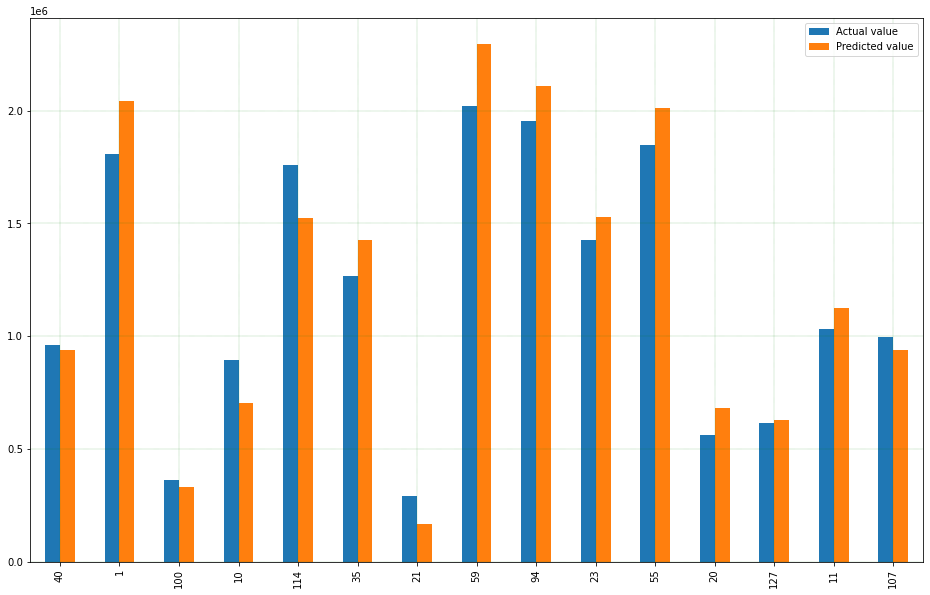

In [51]:
result_df.plot(kind = 'bar', figsize=(16, 10))
plt.grid(which = "major", linestyle = "--", linewidth = "0.2", color = "green")
plt.grid(which = "minor", linestyle = "-", linewidth = "1", color = "black")
plt.show()

##### Analyzing the values of the model's coefficients to know what features are important for the prediction

In [52]:
regressor.coef_

array([-6.33506779e+04, -7.40913313e+04,  1.27477392e+06, -7.91579035e+04,
       -1.01342498e+05, -3.68410220e+03, -3.00115488e+04, -3.03285049e+04,
        5.92470824e+05,  3.92901711e-09,  9.15689879e+05,  2.24327422e+05,
        3.28471190e+05, -8.80646969e+04,  4.10442883e+05,  3.93875972e+05,
        6.35054985e+05,  5.61541145e+04,  1.40726292e+05, -4.52822609e+05,
        8.50578955e+05, -3.58779719e+05,  1.20716607e+04, -8.87517591e+04,
       -1.76592933e+05, -1.81199225e+05, -4.35593457e+04])

In [53]:
coefs = pd.DataFrame(index=X.columns, data = regressor.coef_.transpose(), columns=["Coefficients"])

In [54]:
coefs = coefs.apply(lambda x : abs(x)).sort_values(by="Coefficients", ascending=False)

In [55]:
coefs

,Coefficients
CPI,1.274774e+06
['store']_13.0,9.156899e+05
['store']_4.0,8.505790e+05
['store']_19.0,6.350550e+05
['store']_10.0,5.924708e+05
['store']_3.0,4.528226e+05
['store']_17.0,4.104429e+05
['store']_18.0,3.938760e+05
['store']_5.0,3.587797e+05
['store']_15.0,3.284712e+05


#### Plotting feature importance

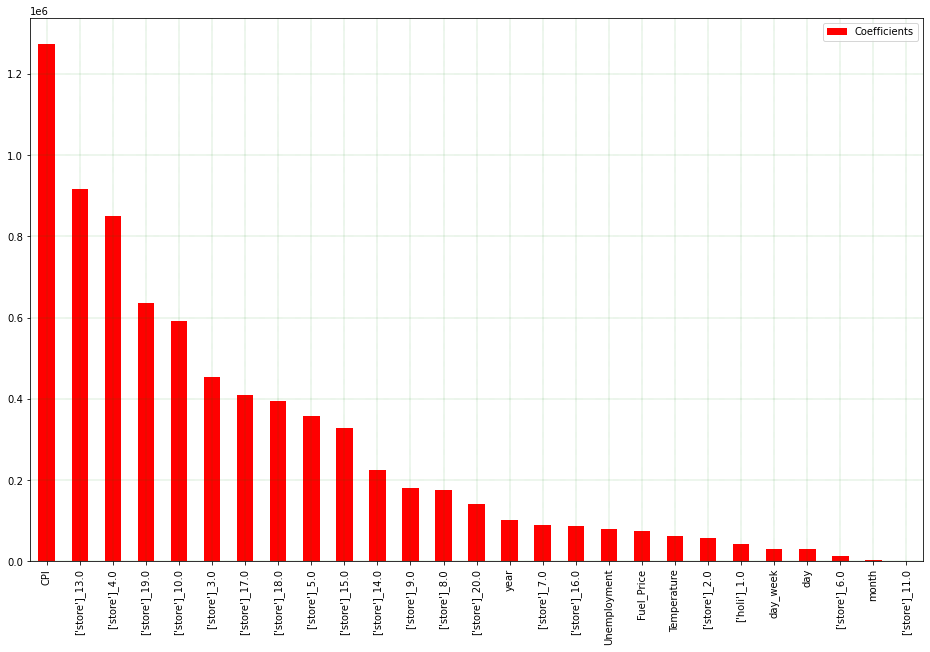

In [56]:
coefs.plot(kind = 'bar', color ="red", figsize=(16, 10))
plt.grid(which = "major", linestyle = "--", linewidth = "0.2", color = "green")
plt.grid(which = "minor", linestyle = "-", linewidth = "1", color = "black")
plt.show()

#####The above graph shows that Consumer Price Index (CPI), used to measure inflation, and the "Store" features - most probably geographic location - strongly influence weekly sales predictions. Astonishingly, the data tell us that unemployment is not a factor which highly impacts weekly sales predictions.

## Experiment 2 : Ridge-regularized model without hyper parameter optimization

### Train pipeline for Ridge-regularized model without hyper parameter optimization

##### Separate target variable y from features X

In [57]:
print("Separating labels from features...")
features_list = ["Store", "Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment", "month", "year","day", "day_week"]
target_variable = "Weekly_Sales"

X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

print("...Done.")
print()

print('y : ')
print(y)
print()
print('X :')
print(X)

Separating labels from features...
...Done.

y : 
1      1807545.43
4      1644470.66
6       695396.19
7      2203523.20
10      895066.50
          ...    
139     532739.77
143     396968.80
144     424513.08
145    2248645.59
149    1255087.26
Name: Weekly_Sales, Length: 71, dtype: float64

X :
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
1    13.0           0.0        42.38       3.435  128.616064         7.470   
4     6.0           0.0        78.89       2.759  212.412888         7.092   
6    15.0           0.0        69.80       4.069  134.855161         7.658   
7    20.0           0.0        39.93       3.617  213.023623         6.961   
10    8.0           0.0        82.92       3.554  219.070197         6.425   
..    ...           ...          ...         ...         ...           ...   
139   7.0           0.0        50.60       3.804  197.588605         8.090   
143   3.0           0.0        78.53       2.705  214.495838         7.343  

In [58]:
dummies_store = pd.get_dummies(X["Store"], prefix=["store"], drop_first=True)

In [59]:
dummies_holiday = pd.get_dummies(X["Holiday_Flag"], prefix=["holi"], drop_first=True)

In [60]:
X = X.drop("Store", axis=1)

In [61]:
X = X.drop("Holiday_Flag", axis=1)

In [62]:
X = pd.concat([X, dummies_holiday], axis=1)

In [63]:
X = pd.concat([X, dummies_store], axis=1)

In [64]:
X.head()

,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_week,['holi']_1.0,['store']_10.0,...,['store']_19.0,['store']_2.0,['store']_20.0,['store']_3.0,['store']_4.0,['store']_5.0,['store']_6.0,['store']_7.0,['store']_8.0,['store']_9.0
1,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,39.93,3.617,213.023623,6.961,2012.0,3.0,2.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
X.shape

(71, 27)

##### Divide dataset into train & test sets

In [66]:
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



##### Standardization of the train dataframe before training the model

In [67]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_train.iloc[0:5,:])

# Standardization
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
print("...Done")
print(X_train_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
54         86.87       3.666  130.719633         7.170  2012.0    6.0   7.0   
122        57.84       3.596  198.095048         7.872  2012.0    7.0   9.0   
63         69.17       3.594  224.019287         5.422  2012.0   10.0  19.0   
121        89.42       3.682  216.046436         6.529  2011.0    7.0  29.0   
78         62.25       3.308  218.220509         7.866  2011.0   11.0  18.0   

     day_week  ['holi']_1.0  ['store']_10.0  ...  ['store']_19.0  \
54        3.0             0               1  ...               0   
122       0.0             1               0  ...               0   
63        4.0             0               0  ...               0   
121       4.0             0               0  ...               0   
78        4.0             0               0  ...               0   

     ['store']_2.0  ['store']_20.0  ['store']_3.0  ['store']_4.0  \
54         

##### Training a Ridge-regularized model without hyper parameter optimization

In [68]:
print("Train model...")
ridge_regressor = Ridge()
ridge_regressor.fit(X_train_transformed, y_train)
print("...Done.")

Train model...
...Done.


#### Prediction on train set

In [69]:
print("Predictions on training set...")
y_train_pred = ridge_regressor.predict(X_train_transformed)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[1877150.25950913  454475.0514777   368844.5853066   160897.15982716
 1519212.20636216  846217.899269   1904014.90837732 1913384.7247385
 2077863.50783365 1472048.31172292 1899138.48673383 2371567.30477538
  458282.66973811 1505653.61297959  304197.0309405   896361.37148978
 1951700.89372768  318062.90975513 2212114.07202917 1411252.10197463
 1331780.20584512 2101439.39980825  672505.71218376  565846.90328433
  792941.07650367  512362.3557382   515880.6445004  2425834.83669026
 1588504.64633455 2119151.31367348 2235123.7892449   474034.61881592
  481781.79466379  691253.19279532 1444220.87911953 2019757.51908377
 1765990.08412672  420726.73592461 2141063.07474802 1129707.65781351
  853911.39665601  466439.62866488 2036280.60514952 1122773.86104483
 1844502.31562061  539355.6807033   488075.07443252 1688504.41076232
 1389650.44120165  401495.94801344  599818.16788501 1586838.92701449
 2131940.73293329  421084.69091989  905064.81807554  384510.1614

### Test pipeline of the Ridge-regularized model without hyper parameter optimization

In [70]:
X_test.shape

(15, 27)

##### Standardization of the test dataframe before prediction

In [71]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_test.iloc[0:5,:])


X_test_transformed = scaler.transform(X_test)
print("...Done")
print(X_test_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
40         50.43       4.023  137.978133         8.304  2012.0    4.0  27.0   
1          42.38       3.435  128.616064         7.470  2011.0    3.0  25.0   
100        83.52       2.637  214.785826         7.343  2010.0    6.0  18.0   
10         82.92       3.554  219.070197         6.425  2011.0    8.0  19.0   
114        69.90       2.735  215.061402         7.564  2010.0   11.0  26.0   

     day_week  ['holi']_1.0  ['store']_10.0  ...  ['store']_19.0  \
40        4.0             0               0  ...               0   
1         4.0             0               0  ...               0   
100       4.0             0               0  ...               0   
10        4.0             0               0  ...               0   
114       4.0             1               0  ...               0   

     ['store']_2.0  ['store']_20.0  ['store']_3.0  ['store']_4.0  \
40         

### Predictions on test set

In [72]:
print("Predictions on test set...")
y_test_pred = ridge_regressor.predict(X_test_transformed)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[1007302.88246451 2044585.48328769  407137.02426595  732396.53366774
 1387931.35268151 1416045.96864397  206621.50862571 2275137.53071084
 2114084.89018917 1474839.07858195 1996661.28449654  660908.44233573
  635183.52691738 1143901.763954    952359.09266856]



### R2 scores of with a Ridge-regularized model without hyper parameter optimization

In [73]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.982265802290854
R2 score on test set :  0.9196675579950595


#####The Ridge-regularized model without hyper parameter optimization does not outperform the baseline model : it gives a score of 98.2 % against 98.6 % for the training set and 91.9 % against 92.8 % for the test set when compared with the baseline model. The use of a much larger training set can prove to be a valuable asset to increase the performance of the model. Furthermore, the Ridge regularization has been used without any hyperparameter optimization. According to the "No free lunch" theorem developed by David Wolpert in a famous paper in 1996, there is no model that is a priori guaranteed to work better. The only way to know for sure which model is best is to evaluate them all. So after looking at what is happening under the hood with some vizualizations, a Ridge model with hyperparamater optimization and Grid Search cross-validation will be built and tested

In [74]:
ridge_df = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_test_pred})
ridge_df

,Actual value,Predicted value
40,961186.23,1.007303e+06
1,1807545.43,2.044585e+06
100,364076.85,4.071370e+05
10,895066.50,7.323965e+05
114,1757242.51,1.387931e+06
35,1266564.94,1.416046e+06
21,290930.01,2.066215e+05
59,2020550.99,2.275138e+06
94,1953544.76,2.114085e+06
23,1427023.45,1.474839e+06


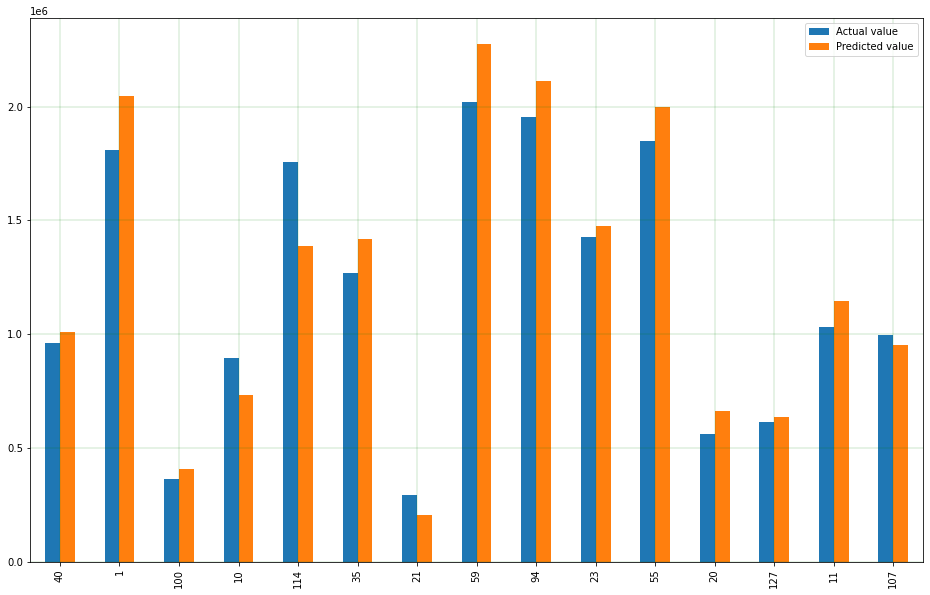

In [75]:
ridge_df.plot(kind = 'bar', figsize=(16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.2", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "1", color = "black")
plt.show()

## Experiment 3 : Ridge-regularized model with hyper parameter optimization

### Train pipeline for Ridge-regularized model with hyper parameter optimization

##### Separate target variable y from features X

In [76]:
print("Separating labels from features...")
features_list = ["Store", "Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment", "month", "year","day", "day_week"]
target_variable = "Weekly_Sales"

X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

print("...Done.")
print()

print('y : ')
print(y)
print()
print('X :')
print(X)

Separating labels from features...
...Done.

y : 
1      1807545.43
4      1644470.66
6       695396.19
7      2203523.20
10      895066.50
          ...    
139     532739.77
143     396968.80
144     424513.08
145    2248645.59
149    1255087.26
Name: Weekly_Sales, Length: 71, dtype: float64

X :
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
1    13.0           0.0        42.38       3.435  128.616064         7.470   
4     6.0           0.0        78.89       2.759  212.412888         7.092   
6    15.0           0.0        69.80       4.069  134.855161         7.658   
7    20.0           0.0        39.93       3.617  213.023623         6.961   
10    8.0           0.0        82.92       3.554  219.070197         6.425   
..    ...           ...          ...         ...         ...           ...   
139   7.0           0.0        50.60       3.804  197.588605         8.090   
143   3.0           0.0        78.53       2.705  214.495838         7.343  

In [77]:
dummies_store = pd.get_dummies(X["Store"], prefix=["store"], drop_first=True)

In [78]:
dummies_holiday = pd.get_dummies(X["Holiday_Flag"], prefix=["holi"], drop_first=True)

In [79]:
X = X.drop("Store", axis=1)

In [80]:
X = X.drop("Holiday_Flag", axis=1)

In [81]:
X = pd.concat([X, dummies_holiday], axis=1)

In [82]:
X = pd.concat([X, dummies_store], axis=1)

In [83]:
X.head()

,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_week,['holi']_1.0,['store']_10.0,...,['store']_19.0,['store']_2.0,['store']_20.0,['store']_3.0,['store']_4.0,['store']_5.0,['store']_6.0,['store']_7.0,['store']_8.0,['store']_9.0
1,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,39.93,3.617,213.023623,6.961,2012.0,3.0,2.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
X.shape

(71, 27)

##### Divide dataset into train & test sets

In [85]:
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



##### Standardization of the train dataframe before training the model

In [86]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_train.iloc[0:5,:])

# Standardization
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
print("...Done")
print(X_train_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
54         86.87       3.666  130.719633         7.170  2012.0    6.0   7.0   
122        57.84       3.596  198.095048         7.872  2012.0    7.0   9.0   
63         69.17       3.594  224.019287         5.422  2012.0   10.0  19.0   
121        89.42       3.682  216.046436         6.529  2011.0    7.0  29.0   
78         62.25       3.308  218.220509         7.866  2011.0   11.0  18.0   

     day_week  ['holi']_1.0  ['store']_10.0  ...  ['store']_19.0  \
54        3.0             0               1  ...               0   
122       0.0             1               0  ...               0   
63        4.0             0               0  ...               0   
121       4.0             0               0  ...               0   
78        4.0             0               0  ...               0   

     ['store']_2.0  ['store']_20.0  ['store']_3.0  ['store']_4.0  \
54         

##### Training a Ridge-regularized model with hyper parameter optimization

In [87]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 2.3, 2.4, 2.5] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train_transformed, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 2.3}
Best R2 score :  0.7492900886525835


#### Prediction on train set

In [88]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
y_train_pred = gridsearch.predict(X_train_transformed)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[1863837.0187663   481163.56909362  374554.50032691  198973.52685439
 1450831.69696774  861587.97204373 1899464.7863599  1912887.96865319
 2055981.33392841 1399134.92608821 1902200.82312334 2362686.6586822
  470171.09128429 1437686.8515338   342052.29425546  909349.17308143
 1936532.49664875  335941.10834572 2194891.07131851 1419379.4497738
 1339550.85612364 2076191.15344088  694738.7536127   591435.39484252
  824632.21038908  522619.02011275  539541.86588066 2386453.40285856
 1587595.37650928 2089329.85491835 2217311.68105238  499238.46638665
  494747.34160638  701072.81335433 1445165.70587963 2033927.76170714
 1741845.18935556  423265.35796525 2130950.26589264 1132172.59463124
  863468.52785251  484480.89037126 2032457.55189866 1137150.22568784
 1845134.86254189  559608.036023    496934.30021707 1674466.48368047
 1377131.67404476  425114.84396458  623125.80640421 1542930.71431772
 2125772.51263023  444522.43980289  902133.40415193  397066.71276

### Test pipeline of the Ridge-regularized model with hyper parameter optimization

In [89]:
X_test.shape

(15, 27)

##### Standardization of the test dataframe before prediction

In [90]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_test.iloc[0:5,:])


X_test_transformed = scaler.transform(X_test)
print("...Done")
print(X_test_transformed[0:5,:])

Standardizing numerical features...

     Temperature  Fuel_Price         CPI  Unemployment    year  month   day  \
40         50.43       4.023  137.978133         8.304  2012.0    4.0  27.0   
1          42.38       3.435  128.616064         7.470  2011.0    3.0  25.0   
100        83.52       2.637  214.785826         7.343  2010.0    6.0  18.0   
10         82.92       3.554  219.070197         6.425  2011.0    8.0  19.0   
114        69.90       2.735  215.061402         7.564  2010.0   11.0  26.0   

     day_week  ['holi']_1.0  ['store']_10.0  ...  ['store']_19.0  \
40        4.0             0               0  ...               0   
1         4.0             0               0  ...               0   
100       4.0             0               0  ...               0   
10        4.0             0               0  ...               0   
114       4.0             1               0  ...               0   

     ['store']_2.0  ['store']_20.0  ['store']_3.0  ['store']_4.0  \
40         

### Predictions on test set

In [91]:
print("Predictions on test set...")
y_test_pred = gridsearch.predict(X_test_transformed)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[1016785.84993574 2036680.11500068  430326.76815109  764535.44322221
 1335046.62935288 1404096.25500091  250538.61218756 2250180.07616755
 2109960.6613379  1461012.28209894 1987223.29359318  673986.63758306
  652091.46528745 1161868.4981461   988501.57344724]



### R2 scores of with a Ridge-regularized model with hyper parameter optimization

In [92]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9785098650604044
R2 score on test set :  0.9171045610028444


In [93]:
ridge_hyper_df = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_test_pred})
ridge_hyper_df

,Actual value,Predicted value
40,961186.23,1.016786e+06
1,1807545.43,2.036680e+06
100,364076.85,4.303268e+05
10,895066.50,7.645354e+05
114,1757242.51,1.335047e+06
35,1266564.94,1.404096e+06
21,290930.01,2.505386e+05
59,2020550.99,2.250180e+06
94,1953544.76,2.109961e+06
23,1427023.45,1.461012e+06


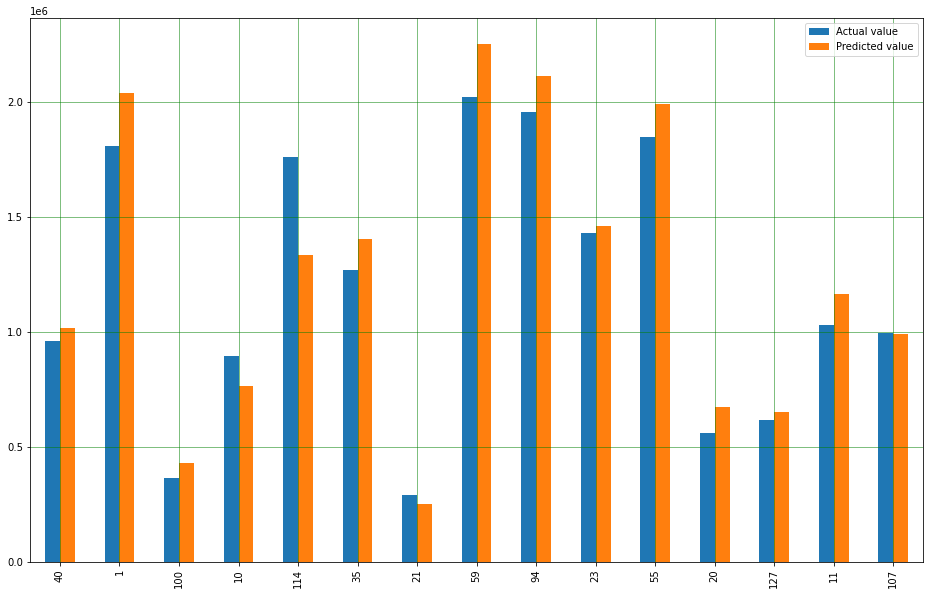

In [94]:
ridge_hyper_df.plot(kind = 'bar', figsize=(16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

### Summary

In [95]:
summary = [["Baseline model", 0.9862582691247349, 0.9281436573874544],
           ["Ridge-regularized model without hyper parameter optimization", 0.982265802290854, 0.9196675579950595],
           ["Ridge-regularized model with hyper parameter optimization", 0.9785098650604044, 0.9171045610028444]]

summary = pd.DataFrame(summary, index=[0, 1, 2], columns=["Model description", "R2 score on training set", "R2 score on test set"])

In [96]:
summary

,Model description,R2 score on training set,R2 score on test set
0,Baseline model,0.986258,0.928144
1,Ridge-regularized model without hyper paramete...,0.982266,0.919668
2,Ridge-regularized model with hyper parameter o...,0.978510,0.917105


### Conclusion

The three different models tested in the exercise lead to the following conclusions :

1 - In Machine learning, depending on the problem to be solved, basic models can sometimes outperform more complex ones.

2 - Training a model with a small amount of data will produce misleading scores. It is not beacause our model gives a R2 score of 98 % at the first try that we should think that the model is the best model ever. We should investigate and try to understand what is going on under the hood. The three models designes above peform more or less correctly despite the fact that they have been trained with limited data. Nevertheless, training these models with more data would have helped them generalize better - prevent overfitting - and make better predictions.

3 - Machine learning being an iterative process and no model being a priori guaranteed to work better, we can experiment with different models to see if they produce better scores. It is better to run the model and record its scores rather than making assumptions about a particular model's performance.